In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = open('LR/1.txt')
line = [line.strip() for line in file]
file.close()

In [3]:
num_of_features = int(line[0])
num_of_train = int(line[1])
num_of_test = int(line[num_of_train + 2])

In [4]:
data_train = pd.read_table('LR/1.txt', sep='\s+', skiprows = 2, header=None, nrows = num_of_train)
data_test = pd.read_table('LR/1.txt', sep='\s+', skiprows = 3 + num_of_train, header=None)

In [5]:
X_test = data_test.iloc[:,:-1].values
X_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1:].values
y_test = data_test.iloc[:,-1:].values

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
y_train_std = scaler.fit_transform(y_train)
X_test_std = scaler.fit_transform(X_test)
y_test_std = scaler.fit_transform(y_test)

In [8]:
y_train_var = np.max(y_train_std)-np.min(y_train_std)
y_test_var = np.max(y_test_std)-np.min(y_test_std)

In [23]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.linspace(0.001, 1, 20),
             'l1_ratio': np.linspace(0, 1, 101)}
sgd = SGDRegressor()
clf = GridSearchCV(sgd, param_grid, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
clf.fit(X_train_std, y_train_std)
param = clf.best_params_
param

Wall time: 22.3 s


C:\Users\Артем\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'alpha': 0.001, 'l1_ratio': 0.02}

In [24]:
sgd = SGDRegressor(penalty='elasticnet', **param)

In [25]:
num_iter = 100
NRMSE_train = np.array([])
NRMSE_test = np.array([])
for i in range(num_iter):
    sgd.partial_fit(X_train_std, y_train_std.flatten())
    y_pred_train = sgd.predict(X_train_std)
    y_pred_test = sgd.predict(X_test_std)
    mse_train = mean_squared_error(y_pred_train, y_train_std)
    NRMSE_train = np.append(NRMSE_train, np.sqrt(mse_train)/y_train_var)
    mse_test = mean_squared_error(y_pred_test, y_test_std)
    NRMSE_test = np.append(NRMSE_test, np.sqrt(mse_test)/y_test_var)

<function matplotlib.pyplot.show(close=None, block=None)>

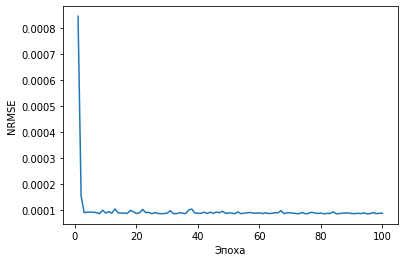

In [26]:
plt.plot(range(1, num_iter+1), NRMSE_train)
#plt.ylim(-0.01, 0.001)
plt.ylabel('NRMSE')
plt.xlabel("Эпоха")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

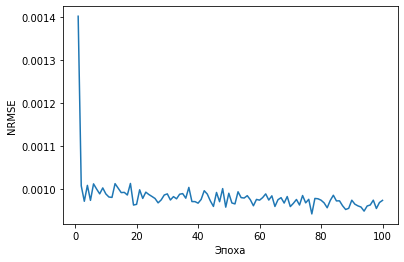

In [27]:
plt.plot(range(1, num_iter+1), NRMSE_test)
plt.ylabel('NRMSE')
plt.xlabel("Эпоха")
plt.show

In [28]:
sgd.fit(X_train_std, y_train_std.flatten())
y_pred_train = sgd.predict(X_train_std)
y_pred_test = sgd.predict(X_test_std)
nrmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train_std))/y_train_var
nrmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test_std))/y_test_var

In [29]:
print('NRMSE for train:', nrmse_train, ', NRMSE for test:', nrmse_test)

NRMSE for train: 9.721277152944892e-05 , NRMSE for test: 0.0009809257621174192
